# Part I - Exploration of the `Prosper Loan Data`
## by Kelvin Njuguna

## Introduction
> The Loan data from prosper contains a total of 113,937 loan records, each with a total of 81 variables. Due to the bulk nature of the dataset, for this Exploratory exercise, only 15 loan variables will be considered. they include:
>> 1. **Term:** The length of the loan expressed in months.
>> 2. **ProsperScore:** A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
>> 3. **BorrowerState:** The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
>> 4. **Occupation:** The Occupation selected by the Borrower at the time they created the listing.
>> 5. **EmploymentStatus:** The employment status of the borrower at the time they posted the listing.
>> 6. **EmploymentStatusDuration:** The length in months of the employment status at the time the listing was created.
>> 7. **IsBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
>> 8. **CreditScoreMid_range:** The arithmetic mean of the `CreditScoreRangeLower` and `CreditScoreRangeUpper`
>> 9. **DelinquenciesLast7Years:** Number of delinquencies in the past 7 years at the time the credit profile was pulled.
>> 10. **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.
>> 11. **LoanOriginalAmount:** The origination amount of the loan.
>> 12. **MonthlyLoanPayment:** The scheduled monthly loan payment.
>> 13. **LP_CustomerPayments:** Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
>> 14. **LP_InterestandFees:** Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries. 

## Load the Datasets

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
# Loading the data
loan_df = pd.read_csv('Datasets/prosperLoanData.csv')

In [3]:
loan_df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

## Preliminary Wrangling

### What is the structure of your dataset?

In [4]:
loan_df.shape

(113937, 81)

> The Loans dataframe has 113937 records, with each record having 81 variables. As mentioned above, for this project, there are only 14 variables of interest. Therefore, it is important to drop off the unwanted variables and only retain the 14 variables of interest. Since we want to retain the original dataset intact, it is necessary to make a copy of the dataset and work with copy.
> **Note** _Since `CreditScoreMid_range` is a calculated value which is obtained by finding the arithmetic average of `CreditScoreRangeLower` and `CreditScoreRangeUpper`, for now, we will retain the `CreditScoreRangeLower` and `CreditScoreRangeUpper` columns.

#### Make a copy of the original dataset

In [5]:
loan_copy_df = loan_df.copy()

#### Verify that the copy of the data was created

In [6]:
# If the copy of the dataframe was created successfully, the assert statement below will pass without an assertion
# error.
assert loan_copy_df.equals(loan_df)

In [7]:
needed_columns = ['Term', 'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
                  'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DelinquenciesLast7Years',
                  'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments',
                  'LP_InterestandFees', 'LoanNumber']

In [8]:
# Drop the unwanted columns
for col in loan_copy_df:
    if col not in needed_columns:
        loan_copy_df.drop(columns=col, axis = 1, inplace=True)

In [9]:
# Verify that the columns were dropped successfully
# If the columns were dropped successfully, the assert tests below will pass without spitting an assertion error
for col in loan_copy_df:
    assert col in needed_columns
for column in needed_columns:
    assert column in loan_copy_df.columns

#### Now, we need to check that all the columns hold the correct data types.

In [10]:
loan_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Term                      113937 non-null  int64  
 1   ProsperScore              84853 non-null   float64
 2   BorrowerState             108422 non-null  object 
 3   Occupation                110349 non-null  object 
 4   EmploymentStatus          111682 non-null  object 
 5   EmploymentStatusDuration  106312 non-null  float64
 6   IsBorrowerHomeowner       113937 non-null  bool   
 7   CreditScoreRangeLower     113346 non-null  float64
 8   CreditScoreRangeUpper     113346 non-null  float64
 9   DelinquenciesLast7Years   112947 non-null  float64
 10  StatedMonthlyIncome       113937 non-null  float64
 11  LoanNumber                113937 non-null  int64  
 12  LoanOriginalAmount        113937 non-null  int64  
 13  MonthlyLoanPayment        113937 non-null  f

> All the columns hold data in the correct datatypes.

#### Check for null entries

In [11]:
loan_copy_df.isnull().sum()

Term                            0
ProsperScore                29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
CreditScoreRangeLower         591
CreditScoreRangeUpper         591
DelinquenciesLast7Years       990
StatedMonthlyIncome             0
LoanNumber                      0
LoanOriginalAmount              0
MonthlyLoanPayment              0
LP_CustomerPayments             0
LP_InterestandFees              0
dtype: int64

The information above reveals that the data is missing some information that is critical to our analysis:
> 1. The `employment status` and `occupation` are critical because without them, we cannot tell where the `stated monthly income` is coming from.
> 2. The `Borrower state` is also an important variable since part of the analysis will focus on how the borrower's state of residence affects loan repayment.
> 3. `Delinquencies withing the last 7 years` is a critical variable since it will play a major role in the data analysis process.

However, some of the missing records can be explained and are therefore not critical. For instance, `a loan applicant with no borrowing history will not have credit scores and prosper score`.

Therefore, we will need to delete entries with null values in the `Occupation`, `EmploymentStatus`, `BorrowerState` and `DelinquenciesLast7Years` columns.

#### Drop the entries with null values in the `Occupation`, `EmploymentStatus`, `BorrowerState` and `DelinquenciesLast7Years` columns.

In [12]:
loan_copy_df.dropna(subset=['BorrowerState', 'Occupation', 'EmploymentStatus', 'DelinquenciesLast7Years'], inplace=True)

#### Verify that the records were dropped successfully.

In [13]:
loan_copy_df.isnull().sum()

Term                            0
ProsperScore                22639
BorrowerState                   0
Occupation                      0
EmploymentStatus                0
EmploymentStatusDuration     2931
IsBorrowerHomeowner             0
CreditScoreRangeLower           0
CreditScoreRangeUpper           0
DelinquenciesLast7Years         0
StatedMonthlyIncome             0
LoanNumber                      0
LoanOriginalAmount              0
MonthlyLoanPayment              0
LP_CustomerPayments             0
LP_InterestandFees              0
dtype: int64

After the operation of deleting the records with the null values, we can gain more insight about the null entries in the `ProsperScore` column. First, it comes to light that since all the records have `CreditScoreRange` entries, we can argue that all the loan applicants have some borrowing history. Therefore, we would expect that all the records should have a `ProspectScore` since it is calculated using historical prosper data.
**Therefore, we need to drop all the records with null entries in the `ProsperScore` column since it is evident that they are erroneous omissions that cannot be explained by the data**

In [14]:
# Drop the records with null entries in the ProsperScore column
loan_copy_df.dropna(subset=['ProsperScore'], inplace=True)

In [15]:
# Verify that the null entries were dropped successfully
loan_copy_df.isnull().sum()

Term                         0
ProsperScore                 0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration    13
IsBorrowerHomeowner          0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DelinquenciesLast7Years      0
StatedMonthlyIncome          0
LoanNumber                   0
LoanOriginalAmount           0
MonthlyLoanPayment           0
LP_CustomerPayments          0
LP_InterestandFees           0
dtype: int64

In [16]:
# Check whether there are records with '0' as the entry in the EmploymentStatusDuration column
loan_copy_df[loan_copy_df.EmploymentStatusDuration == 0]

Term  ProsperScore BorrowerState    Occupation EmploymentStatus  \
51        36           8.0            AR    Nurse (RN)         Employed   
680       36           2.0            TX         Other          Retired   
754       36           9.0            WA  Professional         Employed   
804       36           6.0            KS         Other         Employed   
833       36           2.0            FL         Other            Other   
...      ...           ...           ...           ...              ...   
113298    36           4.0            MD         Other            Other   
113466    36           6.0            UT         Other            Other   
113503    36           7.0            OK  Professional        Full-time   
113548    60           8.0            CO         Other         Employed   
113703    36           2.0            NY     Professor         Employed   

        EmploymentStatusDuration  IsBorrowerHomeowner  CreditScoreRangeLower  \
51                           0.0                 True                  640.0   
680                          0.0                False                  640.0   
754                          0.0                 True                  800.0   
804                          0.0                False                  680.0   
833                          0.0                 True                  760.0   
...                          ...                  ...                    ...   
113298                       0.0                False                  700.0   
113466                       0.0                 True                  740.0   
113503                       0.0                False                  760.0   
113548                       0.0                 True                  700.0   
113703                       0.0                False                  660.0   

        CreditScoreRangeUpper  DelinquenciesLast7Years  StatedMonthlyIncome  \
51                      659.0                      0.0          4853.333333   
680                     659.0                     14.0          1750.000000   
754                     819.0                      0.0          2583.333333   
804                     699.0                      0.0          3833.333333   
833                     779.0                      0.0          4500.000000   
...                       ...                      ...                  ...   
113298                  719.0                     12.0          4166.666667   
113466                  759.0                      0.0          4166.666667   
113503                  779.0                      0.0          2000.000000   
113548                  719.0                      0.0          7666.666667   
113703                  679.0                      0.0          6333.333333   

        LoanNumber  LoanOriginalAmount  MonthlyLoanPayment  \
51           55623                2500               90.37   
680         103738                3500              148.56   
754          76485               10000              321.45   
804          50568                2000               81.64   
833          99150                4000              160.44   
...            ...                 ...                 ...   
113298      100909                5000              186.30   
113466       66570                5000              189.61   
113503       41005                3200              142.95   
113548      134250               14000              367.81   
113703      102597                4000              163.28   

        LP_CustomerPayments  LP_InterestandFees  
51                2439.9900            696.6000  
680                742.8000            424.1100  
754              10386.2100            386.2100  
804               2113.5700            113.5700  
833                962.6400            492.6000  
...                     ...                 ...  
113298            1928.7342            410.3542  
113466            5304.7400            304.7400  
11

Notice that for the records of individuals who had not Employment status duration, the entry is 0. This means that the entries with blank values in the `EmploymentStatusDuration` column cannot be justified. Therefore, we will need to drop all the records with null entries in the `EmploymentStatusDuration` column

In [17]:
# Drop the records with null entries in the EmploymentStatusDuration column
loan_copy_df.dropna(subset='EmploymentStatusDuration', inplace=True)

In [18]:
# Verify that the records were dropped successfully
loan_copy_df.isnull().sum()

Term                        0
ProsperScore                0
BorrowerState               0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
CreditScoreRangeLower       0
CreditScoreRangeUpper       0
DelinquenciesLast7Years     0
StatedMonthlyIncome         0
LoanNumber                  0
LoanOriginalAmount          0
MonthlyLoanPayment          0
LP_CustomerPayments         0
LP_InterestandFees          0
dtype: int64

In [19]:
loan_copy_df.shape

(83507, 16)

In [20]:
loan_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83507 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Term                      83507 non-null  int64  
 1   ProsperScore              83507 non-null  float64
 2   BorrowerState             83507 non-null  object 
 3   Occupation                83507 non-null  object 
 4   EmploymentStatus          83507 non-null  object 
 5   EmploymentStatusDuration  83507 non-null  float64
 6   IsBorrowerHomeowner       83507 non-null  bool   
 7   CreditScoreRangeLower     83507 non-null  float64
 8   CreditScoreRangeUpper     83507 non-null  float64
 9   DelinquenciesLast7Years   83507 non-null  float64
 10  StatedMonthlyIncome       83507 non-null  float64
 11  LoanNumber                83507 non-null  int64  
 12  LoanOriginalAmount        83507 non-null  int64  
 13  MonthlyLoanPayment        83507 non-null  float64
 14  LP_Cu

In [21]:
loan_copy_df.describe()

Term  ProsperScore  EmploymentStatusDuration  \
count  83507.000000  83507.000000              83507.000000   
mean      42.515957      5.964877                103.344306   
std       11.669560      2.375938                 96.219084   
min       12.000000      1.000000                  0.000000   
25%       36.000000      4.000000                 31.000000   
50%       36.000000      6.000000                 75.000000   
75%       60.000000      8.000000                148.000000   
max       60.000000     11.000000                755.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  DelinquenciesLast7Years  \
count           83507.000000           83507.000000             83507.000000   
mean              699.649610             718.649610                 3.638893   
std                47.201439              47.201439                 9.319570   
min               600.000000             619.000000                 0.000000   
25%               660.000000             679.000000                 0.000000   
50%               700.000000             719.000000                 0.000000   
75%               720.000000             739.000000                 2.000000   
max               880.000000             899.000000                99.000000   

       StatedMonthlyIncome     LoanNumber  LoanOriginalAmount  \
count         8.350700e+04   83507.000000        83507.000000   
mean          5.966762e+03   86055.585472         9104.256541   
std           8.297231e+03   28765.247582         6300.693843   
min           0.000000e+00   38045.000000         1000.000000   
25%           3.500000e+03   60616.500000         4000.000000   
50%           5.000000e+03   87125.000000         7500.000000   
75%           7.166667e+03  108399.500000        14000.000000   
max           1.750003e+06  136486.000000        35000.000000   

       MonthlyLoanPayment  LP_CustomerPayments  LP_InterestandFees  
count        83507.000000         83507.000000        83507.000000  
mean           292.488673          3718.453936         1055.368058  
std            186.969305          4247.818219         1139.777457  
min              0.000000            -2.349900           -2.349900  
25%            158.030000           837.720000          264.090000  
50%            252.480000          2267.880000          689.450000  
75%            389.485000          4939.490000         1453.300000  
max           2251.510000         37369.160000        10572.780000

As indicated in the introduction section, on of the datasets that will be using for the analysis phase is `CreditScoreMid_range`. We need to calculate this column from the `CreditScoreRangeLower` and `CreditScoreRangeUpper`

#### Calculate the `CreditScoreMid_range` column from the `CreditScoreRangeLower` and `CreditScoreRangeUpper` column data and drop the unwanted columns.

In [22]:
# calculate the mid_range column
loan_copy_df['CreditScoreMid_range'] = loan_copy_df.loc[:, ['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)

# Now drop the unused columns.
loan_copy_df.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'], inplace=True)

#### Create tests that verifies that the above operation was successful.
**`Note:** If the operations were successful, the assert tests will pass without spitting assertion errors.`

In [23]:
# Verify that the new column was created successfully
new_col = 'CreditScoreMid_range'
assert new_col in loan_copy_df.columns, "New column not created successfully"

# Verify that the data was dropped as required.
unused_cols=['CreditScoreRangeLower', 'CreditScoreRangeUpper']
for col in unused_cols:
    assert col not in loan_copy_df.columns, "There was an error dropping the columns"

### The data is now clean and can be saved in a new csv file which will be used for further analysis.

#### Save the cleaned data in a csv file named `clean_loan_df`

In [24]:
loan_copy_df.to_csv('Datasets/clean_loan_data.csv', index=False)

## Data Exploration

### Load the Cleaned data into the pandas dataframe

In [25]:
clean_loan_df = pd.read_csv('Datasets/clean_loan_data.csv')
clean_loan_df.sample(10)

Term  ProsperScore BorrowerState               Occupation  \
4450     36           5.0            AL                Executive   
53889    60           3.0            GA                    Other   
5357     36           7.0            VT                    Other   
24384    36           5.0            OH                    Other   
36173    60           6.0            FL                Executive   
67970    36           4.0            CT           Accountant/CPA   
27662    36          10.0            PA           Sales - Retail   
41503    60           2.0            TX                 Investor   
62708    60           9.0            GA  Food Service Management   
51191    36           5.0            WI             Truck Driver   

      EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
4450          Employed                      66.0                 True   
53889         Employed                       1.0                 True   
5357          Employed                     187.0                 True   
24384         Employed                     156.0                 True   
36173         Employed                     116.0                 True   
67970         Employed                      48.0                 True   
27662         Employed                      72.0                 True   
41503         Employed                      98.0                 True   
62708         Employed                       1.0                 True   
51191         Employed                     431.0                False   

       DelinquenciesLast7Years  StatedMonthlyIncome  LoanNumber  \
4450                       0.0          9583.333333      103726   
53889                      0.0          2500.000000      133218   
5357                       0.0          4666.666667      110118   
24384                      4.0          4500.000000      135440   
36173                      0.0         14239.166667       91963   
67970                      0.0          4672.000000       49740   
27662                      3.0         10000.000000       57181   
41503                      0.0          6000.000000       67821   
62708                      0.0          4333.333333       65263   
51191                      0.0          3500.000000      118869   

       LoanOriginalAmount  MonthlyLoanPayment  LP_CustomerPayments  \
4450                 3000              102.52             511.4501   
53889                4000               98.02               0.0000   
5357                15000              487.54            1458.3049   
24384               10000              332.10               0.0000   
36173               25000              605.17            5941.3600   
67970                3500              137.30            4363.6000   
27662               13000              461.16           11990.1600   
41503               15000              450.00           17421.5000   
62708               12054              290.01            6090.2100   
51191                2000               74.43             223.2900   

       LP_InterestandFees  CreditScoreMid_range  
4450             166.7201                 689.5  
53889              0.0000                 709.5  
5357             383.0949                 749.5  
24384              0.0000                 669.5  
36173           2754.7500                 729.5  
67970           1470.7200                 829.5  
27662           3277.8400                 689.5  
41503           2421.5000                 709.5  
62708           2887.1700                 769.5  
51191             97.1800                 689.5

#### Question 1: How is the population of borrowers distributed throughout the States?

> To check the number of borrowers in every state, we can simply use the pandas `value_counts()` function as shown below.

In [26]:
# Using the value_counts() function to view the number of borrowers per state.
borrowers_by_state = clean_loan_df.BorrowerState.value_counts()
borrowers_by_state

CA    10589
NY     5743
TX     5552
FL     5314
IL     4204
OH     3316
GA     3296
VA     2740
NJ     2682
PA     2635
MI     2556
NC     2400
MD     2218
WA     2125
MA     1818
MO     1758
CO     1710
MN     1702
IN     1634
TN     1517
WI     1494
CT     1480
AZ     1327
OR     1187
AL     1163
NV      992
SC      976
KY      873
KS      839
LA      829
AR      754
OK      720
MS      657
NE      545
UT      509
NH      438
RI      403
ID      393
HI      340
NM      328
DC      325
WV      301
DE      265
MT      218
SD      188
AK      167
VT      165
WY      122
Name: BorrowerState, dtype: int64

> Although this does give a dictionary showing the number of borrowers in every state, the data presentation is not that insightful. To make it more presentable, we can use seaborn to visualize it.

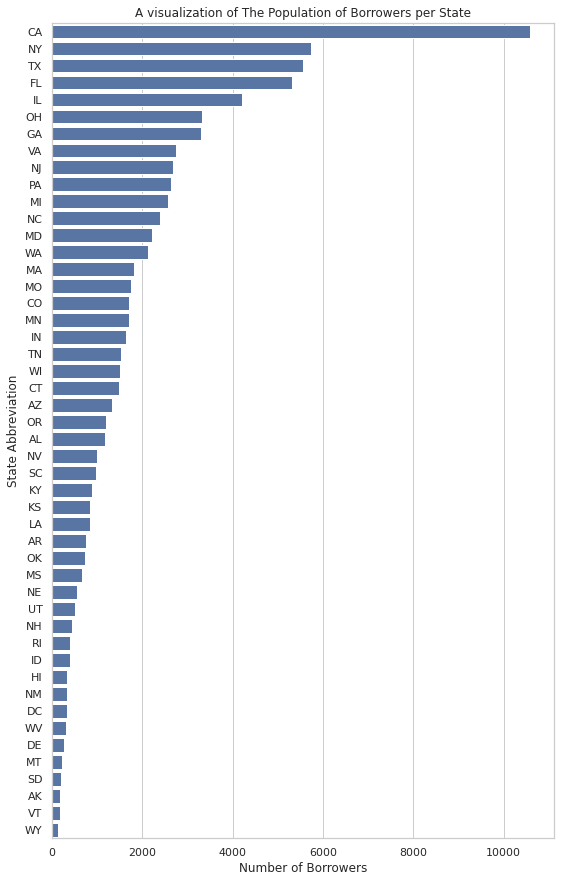

In [27]:
# Visualize the data above using seaborn

# Set the theme of the visualization
sns.set_theme(style="whitegrid")

# Set the size of the visualization
f, ax = plt.subplots(figsize=(9,15))

# Set the color of the visualization
base_color = sns.color_palette()[0]

# Define the order in which the bars will appear in the visualization
population_order = clean_loan_df.BorrowerState.value_counts().index

# Visualize the bar graph.
sns.countplot(data=clean_loan_df, y = 'BorrowerState', color = base_color, order=population_order);

# Set the labels and plot title
plt.title('A visualization of The Population of Borrowers per State')
plt.xlabel('Number of Borrowers')
plt.ylabel('State Abbreviation');

> The visualization above clearly indicates that the California (CA) had the highest number of borrowers (Over 10,000), while Wyoming State had the lowest population of borrowers.

> The above visualization looks much better than the initially displayed series that contained the state code as an index and the borrower population in that state as the values. However, much can still be done to make the data more presentable. It is possible to display the data in form of a heatmap on the United States geographical map.

**The code in the cell below does just that...**

In [28]:
# First convert the Series to a pandas dataframe.
borrowers_by_state = borrowers_by_state.to_frame(name='borrower_population').reset_index()
borrowers_by_state.head()

index  borrower_population
0    CA                10589
1    NY                 5743
2    TX                 5552
3    FL                 5314
4    IL                 4204

In [29]:
# Rename the column with the name index to "State"
borrowers_by_state.rename(columns = {'index':'State'}, inplace=True)

# verify that the column header has been changed as required.
################## This should pass without an error ######################
assert 'index' not in borrowers_by_state.columns and 'State' in borrowers_by_state.columns

In [30]:
# Using the newly created dataframe, generate a heatmap indicating the population of borrowers in every state.
fig = px.choropleth(borrowers_by_state,
                   locations='State',
                    locationmode='USA-states',
                   scope = 'usa',
                   color='borrower_population',
                   color_continuous_scale=px.colors.sequential.Inferno_r)
fig.update_layout(title_text = 'Borrower population by State',
                  title_font_size = 22,
                  title_font_color = 'black',
                  title_x = 0.5)
fig.show();

> **From a user's perspective, it is evident that California has the highest population of borrowers. In this visualization, the user can clearly see the location of every State, which makes the data even more engaging.**

#### Question 2: How many borrowers fall under every listed occupation?

In [31]:
clean_loan_df.Occupation.value_counts()

Other                          21317
Professional                   10539
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

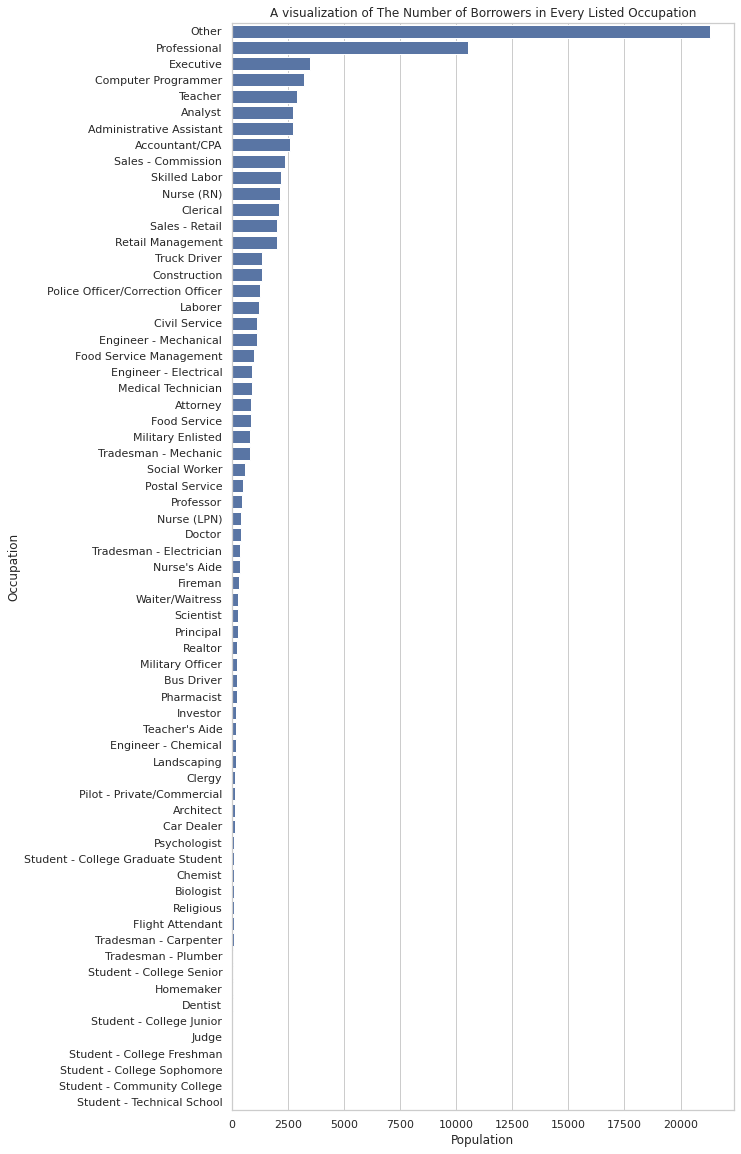

In [32]:
# Set the theme of the visualization
sns.set_theme(style="whitegrid")

# Set the size of the visualization
f, ax = plt.subplots(figsize=(9,20))

# Set the color of the visualization
base_color = sns.color_palette()[0]

# Define the order in which the bars will appear in the visualization
occupations_order = clean_loan_df.Occupation.value_counts().index

# Visualize the bar graph.
sns.countplot(data=clean_loan_df, y = 'Occupation', color = base_color, order=occupations_order);

# Set the labels and plot title
plt.title('A visualization of The Number of Borrowers in Every Listed Occupation')
plt.xlabel('Population')
plt.ylabel('Occupation');

> The above visualization indicates that the individuals who listed their occupation as `Other` top the list, followed by those the a `Professional` occupation. The borrowers with `Student - Technical School` as their occupation are the fewest. In fact, the data indicates that they were only 2 of them.

**To get an even better insight about the number of borrowers who listed a specific occupation, let us get rid of those who listed their occupation as `Other` from the visualization.**

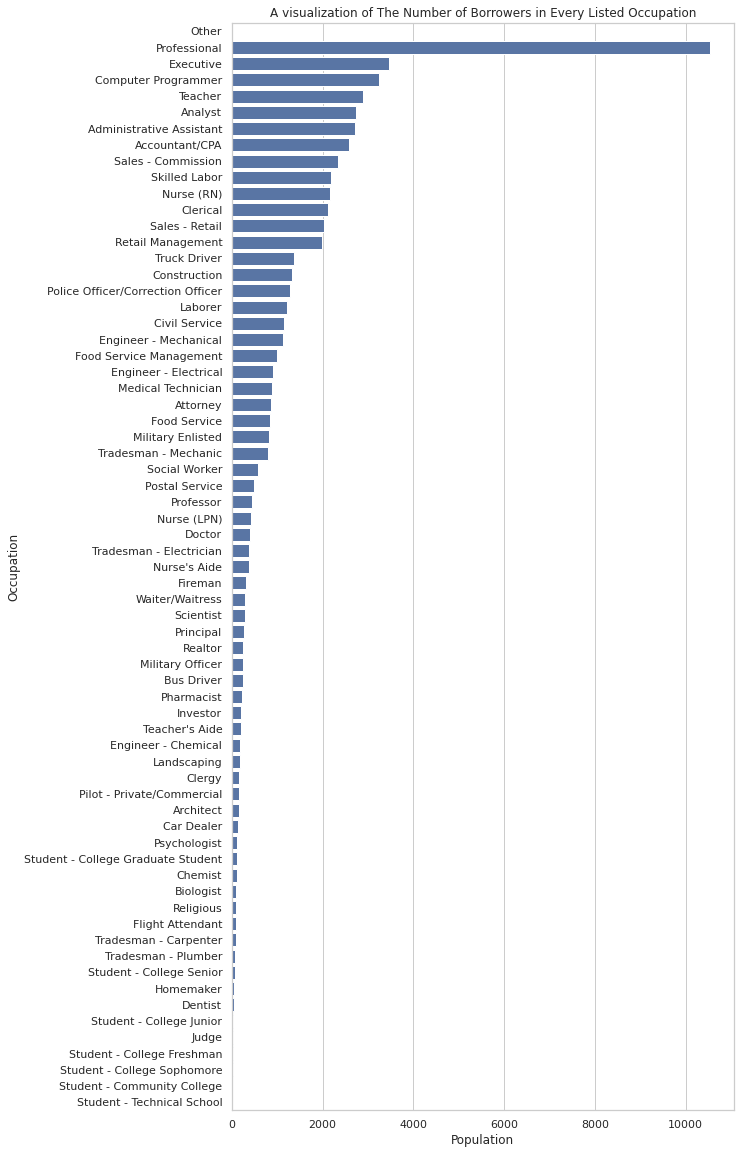

In [33]:
# Set the theme of the visualization
sns.set_theme(style="whitegrid")

# Set the size of the visualization
f, ax = plt.subplots(figsize=(9,20))

# Set the color of the visualization
base_color = sns.color_palette()[0]

# Define the order in which the bars will appear in the visualization
occupations_order = clean_loan_df.Occupation.value_counts().index

# Visualize the bar graph.
sns.countplot(data=clean_loan_df[-(clean_loan_df.Occupation == 'Other')], y = 'Occupation', color = base_color, order=occupations_order);

# Set the labels and plot title
plt.title('A visualization of The Number of Borrowers in Every Listed Occupation')
plt.xlabel('Population')
plt.ylabel('Occupation');

The visualization above clearly indicates that after eliminating the Borrowers who listed their occupation as `Other`, the number of Borrowers who have `Professional` occupations is disproportionately high.

#### Question 3: How many borrowers fall in every employment status category?

In [34]:
# Display the number of borrowers in every category
clean_loan_df.EmploymentStatus.value_counts()

Employed         67309
Full-time         7916
Self-employed     4536
Other             2474
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

> Notice that in the employment status column, there are borrowers who listed their status as `Employed - (67309)`, `Full-time - (7916)` and `Part-time - (256)`. Here, one concern is that the borrowers who listed their employment status as `employed` are either part-time or full-time employees. However, there is not means of telling in which category each one of them is. Therefore, it would make more sense if all the three employment status categories were collapsed into one category that only indicates whether the employee is employed, dabbed `Employed`.

In [35]:
# Edit the 'full-time' and 'part-time' entries in the EmploymentStatus column to simply 'employed'
clean_loan_df.EmploymentStatus.replace(['Full-time', 'Part-time'], 'Employed', inplace=True)

In [36]:
# Verify whether the entries have been updated successfully.

# If the entry replacement was successful, then, the test below will pass without an assertion error.
assert 'Part-time' and 'Full-time' not in clean_loan_df.EmploymentStatus

> Now, since there are only five categories to draw insights from, we can use a pie chart to visualize the data

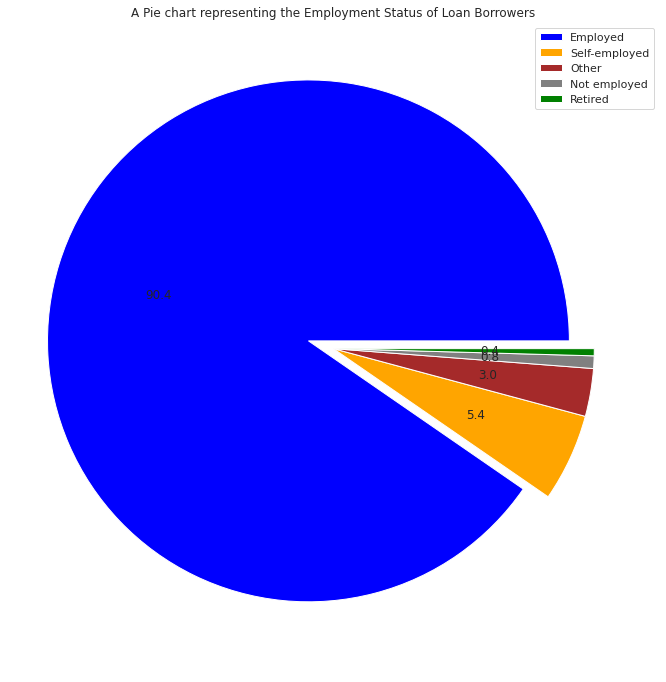

In [37]:
# use a pie chart to visualize the various employment status categories.
e_status_sorted = clean_loan_df.EmploymentStatus.value_counts()

pie_colors = ['blue', 'orange', 'brown', 'gray', 'green']
f, ax = plt.subplots(figsize=(12,12))
plt.pie(e_status_sorted, explode=(0.1, 0, 0, 0, 0),colors=pie_colors, autopct = '%.1f');
plt.legend(e_status_sorted.index)
plt.title('A Pie chart representing the Employment Status of Loan Borrowers');

#### Insights from the pie chart.
> - The pie chart above indicates that the Employed individuals make up more than 90% of the loan borrower population.
> - About 5.4% of the Borrowers were self employed.
> - About 3.0% of the Borrowers listed they employment status as `other`.
> - About 0.8% of the Borrowers were unemployed.
> - Only 0.4% of the Borrowers were retired.

#### Question 4: What proportion of the borrowers owned homes?

In [38]:
clean_loan_df.IsBorrowerHomeowner.value_counts()

True     44232
False    39275
Name: IsBorrowerHomeowner, dtype: int64

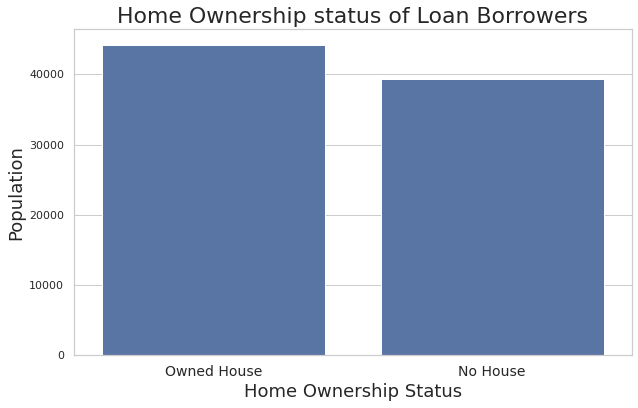

In [39]:
# Set the theme of the visualization
sns.set_theme(style="whitegrid")

# Set the size of the visualization
f, ax = plt.subplots(figsize=(10,6))

# Set the color of the visualization
base_color = sns.color_palette()[0]

# Define the order in which the bars will appear in the visualization
arr_order = clean_loan_df.IsBorrowerHomeowner.value_counts().index

# Visualize the bar graph.
sns.countplot(data=clean_loan_df, x = 'IsBorrowerHomeowner', color = base_color, order=arr_order);

ax.set_xticklabels(['Owned House', 'No House'], size=14)

# Set the labels and plot title
plt.title('Home Ownership status of Loan Borrowers', size = 22)
plt.xlabel('Home Ownership Status', size = 18)
plt.ylabel('Population', size = 18);

#### Question 5: How are the stated monthly incomes distributed?

In [40]:
clean_loan_df.StatedMonthlyIncome.describe()

count    8.350700e+04
mean     5.966762e+03
std      8.297231e+03
min      0.000000e+00
25%      3.500000e+03
50%      5.000000e+03
75%      7.166667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

> From the above descriptive summary, the minimum stated monthly income was 0 while the maximum stated monthly income was 1750002.916667. To gain some more insight into how the monthly salaries have been distributed, we generate a box plot to visualize the summary statistics

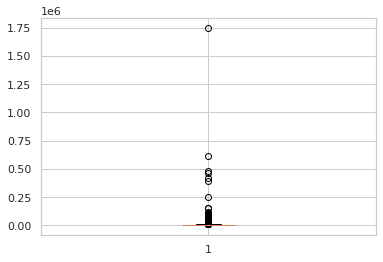

In [41]:
# Generate a boxplot to visualize the distribution of the data in the stated monthly income column.
monthly_income = clean_loan_df['StatedMonthlyIncome']
fig, ax = plt.subplots()
ax.boxplot(monthly_income)
plt.show()

> The above generated box plot indicates that the data has very many outliers. To make the visualization more insightful, it is necessary to drop the outliers.

#### Fix the outlier problem
In statistics, the `max = q75+(1.5*intr_qr)` and `min = q25-(1.5*intr_qr)` where:
- `Maxim = Maximum value`
- `minim = minimum value`
- `q75 = 75th percentile`
- `q25 = 25th percentile`
- `intr_qr = interquartile range`

In [42]:
# Calculate the lower quartile and the upper quartile values.
for salary in clean_loan_df.StatedMonthlyIncome:
    q75, q25 = np.percentile(clean_loan_df.loc[:,'StatedMonthlyIncome'],[75,25])
    
    # Calculate the Interquartile Range
    intr_qr = q75-q25
    
    # Calculate the Minimum and maximum possible values for the stated monthly income entries.
    maxim = q75+(1.5*intr_qr)
    minim = q75-(1.5*intr_qr)
    
    # Replace the outliers with np.nan
    clean_loan_df.loc[clean_loan_df['StatedMonthlyIncome'] < minim,'StatedMonthlyIncome'] = np.nan
    clean_loan_df.loc[clean_loan_df['StatedMonthlyIncome'] > maxim,'StatedMonthlyIncome'] = np.nan

In [43]:
# Check the number of outliers replaced with np.nan in the StatedMonthlyIncome column.
clean_loan_df.isnull().sum()

Term                           0
ProsperScore                   0
BorrowerState                  0
Occupation                     0
EmploymentStatus               0
EmploymentStatusDuration       0
IsBorrowerHomeowner            0
DelinquenciesLast7Years        0
StatedMonthlyIncome         6738
LoanNumber                     0
LoanOriginalAmount             0
MonthlyLoanPayment             0
LP_CustomerPayments            0
LP_InterestandFees             0
CreditScoreMid_range           0
dtype: int64

> After the above operation, a total of 6738 outliers have been replaced with np.nan. 

To complete the operation of dealing with outliers, we need to drop the null entries from the dataset.

In [44]:
# Drop the null entries
clean_loan_df.dropna(inplace=True)

In [45]:
# Verify that the Null entries were dropped.
clean_loan_df.isnull().sum()

Term                        0
ProsperScore                0
BorrowerState               0
Occupation                  0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
DelinquenciesLast7Years     0
StatedMonthlyIncome         0
LoanNumber                  0
LoanOriginalAmount          0
MonthlyLoanPayment          0
LP_CustomerPayments         0
LP_InterestandFees          0
CreditScoreMid_range        0
dtype: int64

In [46]:
# Check the descriptive summary of the cleaned data.
clean_loan_df.StatedMonthlyIncome.describe()

count    76769.000000
mean      5464.303542
std       2449.339903
min       1666.666667
25%       3583.333333
50%       5000.000000
75%       6916.666667
max      12666.666667
Name: StatedMonthlyIncome, dtype: float64

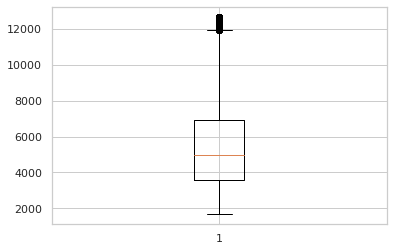

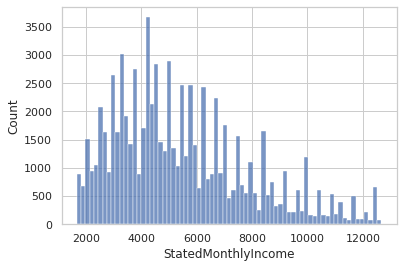

In [47]:
# Now, use the cleaned data to generate a more reasonable histogram.
monthly_income = clean_loan_df['StatedMonthlyIncome']
fig, ax = plt.subplots()
ax.boxplot(monthly_income)
plt.show()

sns.histplot(clean_loan_df, x = 'StatedMonthlyIncome')
plt.show()

> The above visualizations indicates that the distribution of stated montly income is right tailed. The histogram can be refined further by setting the bins size.

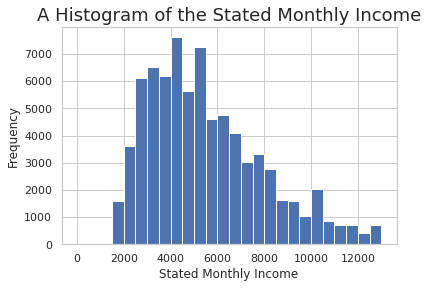

In [48]:
# Set the bins size to refine the histogram.
bins = np.arange(0, clean_loan_df.StatedMonthlyIncome.max()+500, 500)
plt.hist(data = clean_loan_df, x = 'StatedMonthlyIncome', bins=bins);
plt.title('A Histogram of the Stated Monthly Income', size = 18)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Frequency');

> This histogram is more refined as compared to the initial one. Here, the trend of the data is clear, that most of the records are concentrated around between 2000 and 6000, which makes the distribution of the stated monthly incomes right tailed.

#### Question 6: How are the Loan Original Amounts distributed?

In [49]:
clean_loan_df.LoanOriginalAmount.describe()

count    76769.000000
mean      8987.549024
std       6060.323590
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

> From the descriptive statistics above, the minimum original loan amount was 1000 while the maximum loan amount was 35000. The mean of all the loan entries is approximately 8987. To get better insight into these statistics, **`we can generate a boxplot to show the 5-number summary`**. **`A Violine plot can also suffice`.**

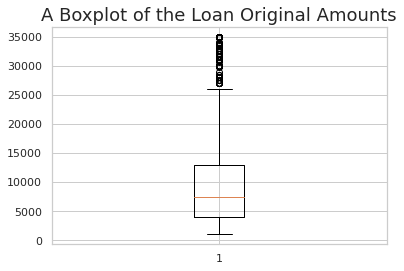

In [50]:
# Generate a boxplot to visualize the descriptive statistics.
fig, ax = plt.subplots()
ax.boxplot(clean_loan_df.LoanOriginalAmount)
plt.title('A Boxplot of the Loan Original Amounts', size = 18)
plt.show()

> The boxplot above shows that most of the data is concentrated between 4000 and 13000. The visualization also suggests that there are some entries that can be termed as outliers. However, the boxplot fails to clearly show the shape of the distribution. A histogram with a curve that shows the distribution would work well to show how the original loan amount are distributed.

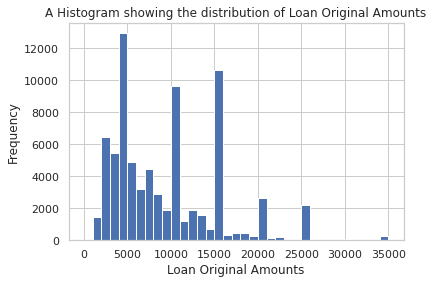

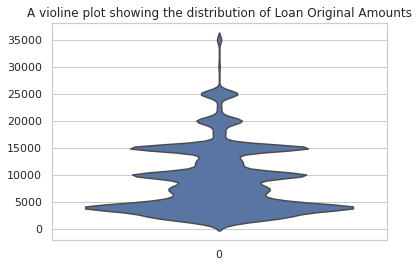

In [51]:
# Histogram showing the distribution of Loan Original Amounts.
bins = np.arange(0, clean_loan_df.LoanOriginalAmount.max()+1000, 1000)

# plt.subplots(1,2)
# plt.subplot(1,2,1)
plt.hist(data = clean_loan_df, x = 'LoanOriginalAmount', bins=bins);
plt.title('A Histogram showing the distribution of Loan Original Amounts')
plt.xlabel('Loan Original Amounts')
plt.ylabel('Frequency');
plt.show()

# Generate a Viloine plot to visualize the descriptive statistics.
# plt.subplot(1,2,2)
sns.violinplot(data=clean_loan_df.LoanOriginalAmount, inner = None)
plt.title('A violine plot showing the distribution of Loan Original Amounts')
plt.show()

> The histogram suggests that the distribution of loan original amounts is right tailed. 35000 appears to be an outlier in the data. To get more insight about this entry, we need to check the data from the dataframe.

In [52]:
# Isolate the records that contain 35000 in the loan original amount column
df = clean_loan_df[clean_loan_df.LoanOriginalAmount == 35000]
df.head()

Term  ProsperScore BorrowerState                  Occupation  \
24      36           6.0            LA                       Other   
507     60          10.0            GA  Pilot - Private/Commercial   
905     36           9.0            TX         Computer Programmer   
1020    36          10.0            VT                   Executive   
1062    60           9.0            NC                   Executive   

     EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
24           Employed                      16.0                 True   
507          Employed                      32.0                 True   
905          Employed                       0.0                False   
1020         Employed                      30.0                 True   
1062         Employed                     117.0                 True   

      DelinquenciesLast7Years  StatedMonthlyIncome  LoanNumber  \
24                        0.0         10416.666667      127405   
507                       0.0          9166.666667      118574   
905                       0.0          8333.333333      104437   
1020                      0.0         11666.666667      110981   
1062                      0.0          9166.666667      108299   

      LoanOriginalAmount  MonthlyLoanPayment  LP_CustomerPayments  \
24                 35000             1169.03            1157.1492   
507                35000              814.21            2442.6300   
905                35000             1196.05            5966.8349   
1020               35000             1162.33            3475.4927   
1062               35000              836.33            3330.7447   

      LP_InterestandFees  CreditScoreMid_range  
24              356.4292                 749.5  
507            1219.6000                 769.5  
905            1921.9449                 749.5  
1020           1021.3127                 749.5  
1062           1719.7847                 749.5

In [53]:
# Assess the isolated records to see the occupation of the employees who got a loan of 35000
df.Occupation.value_counts()

Professional                         47
Other                                40
Executive                            34
Computer Programmer                  17
Nurse (RN)                           13
Accountant/CPA                       12
Analyst                              11
Police Officer/Correction Officer    10
Engineer - Electrical                 7
Engineer - Mechanical                 7
Construction                          6
Pharmacist                            5
Attorney                              5
Sales - Commission                    5
Pilot - Private/Commercial            4
Teacher                               4
Principal                             3
Professor                             3
Car Dealer                            2
Doctor                                2
Scientist                             2
Chemist                               2
Skilled Labor                         2
Engineer - Chemical                   1
Food Service Management               1


> The exploration above indicates that majority of the individuals who got a loan of 35000 were `professionals`, `executives`, `computer programmers`, `Registered Nurses`, and `Accountants`.

#### Question 7: Is there a correlation between the stated monthly salary and montly loan payment?

> To effectively respond to this question, we generate a scatter plot that explores the relationship between these two variables

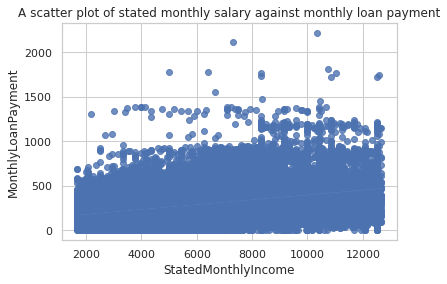

In [54]:
# generate a scatter plot/regression plot
sns.regplot(data=clean_loan_df, x='StatedMonthlyIncome', y='MonthlyLoanPayment');
plt.title('A scatter plot of stated monthly salary against monthly loan payment');

> Generally, the regression line indicates that an upward trend, that is, a positive relationship between stated monthly income and montly loan payment. However, the scatter plot does not look very appealing. This is because most of the dataplots overwrap.
**To address this issue, we need to use Jitter and scatter the overwrapping plots**

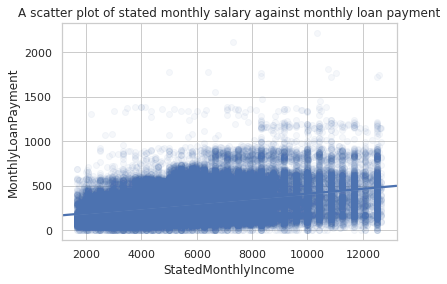

In [55]:
#Add jitter and scatter to the visualization above
sns.regplot(data=clean_loan_df, x='StatedMonthlyIncome', y='MonthlyLoanPayment', truncate=False, x_jitter=0.7, scatter_kws={'alpha':1/20});
plt.title('A scatter plot of stated monthly salary against monthly loan payment');

> The visualization above shows more clearly the positive relationship that exists between the stated monthly salaries of the borrowers and the monthly loan payment amounts.

#### Question 8: Is there a correlation between the stated monthly salary and the Credit Score Mid_range?

> To respond to this question, we need to generate a scatter plot of `stated monthly income` against `Credit Score Midrange`

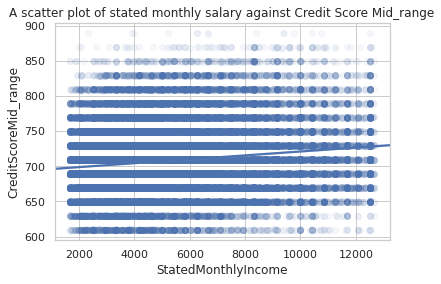

In [56]:
#Add jitter and scatter to the visualization above
sns.regplot(data=clean_loan_df, x='StatedMonthlyIncome', y='CreditScoreMid_range', truncate=False, x_jitter=0.7, y_jitter=0.7, scatter_kws={'alpha':1/20});
plt.title('A scatter plot of stated monthly salary against Credit Score Mid_range');

> The scatter plot above indicates a positive relationship between the `stated monthly income` and `credit score midrange`. This implies that `borrowers with a higher stated monthly income tend to have a higher credit score mid_range`

#### Question 9: Is there a correlation between the `Monthly Loan Payment` and the `Credit Score Mid_range`?

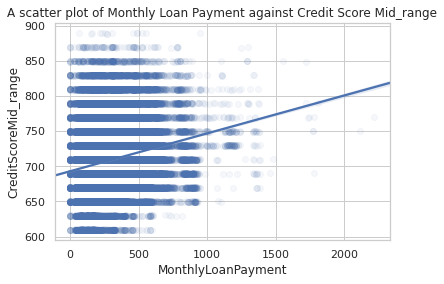

In [57]:
#Add jitter and scatter to the visualization above
sns.regplot(data=clean_loan_df, x='MonthlyLoanPayment', y='CreditScoreMid_range', truncate=False, y_jitter=0.7, scatter_kws={'alpha':1/20});
plt.title('A scatter plot of Monthly Loan Payment against Credit Score Mid_range');

#### Question 10: How does `employment status` play in the relationship between `Monthly Loan Payment` and the `Credit Score Mid_range`?

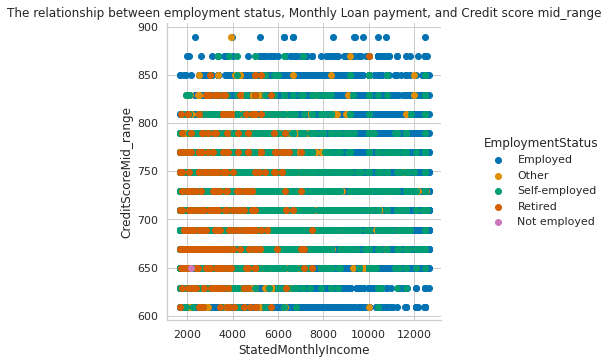

In [58]:
g = sns.FacetGrid(data = clean_loan_df, hue = 'EmploymentStatus', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'StatedMonthlyIncome', 'CreditScoreMid_range')
g.add_legend();
plt.title('The relationship between employment status, Monthly Loan payment, and Credit score mid_range');

## Conclusions
The above Data analysis process has revealed several traits about the loan data.

### Findings:
> 1. About 90.4% of the Borrowers were Employed, 5.4% were self-employed, 3% listed their emloyment status as `Other`, 0.8% were unemployed and 0.4% were retired.
> 2. About 52% of the borrowers were home owners while about 48% did not own a home.
> 3. The distribution of montly incomes is right tailed
> 4. The distribution of Loan original amount is right tailed.
> 5. There exist a positive correlation between stated monthly income and montly loan payment.
> 6. There exist a positive correlation between stated monthly income and borrower's credit score.
> 7. There exist a positive correlation between monthly loan payment and credit score.